# Data Preprocessing

### Step 1 : Load the Datasets

In [3]:
import pandas as pd

### Load stock_tweets.csv into a DataFrame
tweets_df = pd.read_csv('stock_tweets.csv')

### Load stock_yfinance_data.csv into a DataFrame
yfinance_df = pd.read_csv('stock_yfinance_data.csv')


In [4]:
tweets_df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [5]:
yfinance_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


### Step 2 : Data Cleaning and Preprocessing(Tweets Dataset)

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


# download the required nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# define the stop words
stop_words = set(stopwords.words('english'))

# initialize the lemmatizer
lemmatizer = WordNetLemmatizer()


# define a function to clean and process the tweets
def clean_tweet(tweet):
    # remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # tokenize the tweet
    tokens = word_tokenize(tweet.lower())
    # remove the stop words and lemmatize the tokens
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # remove special characters
    clean_tokens = [re.sub(r'[^\w\s]', '', token) for token in clean_tokens]
    # join the clean tokens to form a cleaned tweet
    cleaned_tweet = ' '.join(clean_tokens)
    return cleaned_tweet

# apply the clean_tweet function to the tweets dataframe
tweets_df['cleaned_tweet'] = tweets_df['Tweet'].apply(clean_tweet)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samou\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 3: Data Cleaning and Consistency (Stock Market Data)
Objective: Ensure data consistency and correct formatting.
Tasks:
Check for any missing values in important columns like Open, Close, Volume.
Ensure the Date columns in both datasets are in the same format.

In [7]:
# check for missing values in important columns
print("Missing values in tweets_df:")
print(tweets_df[['Tweet', 'cleaned_tweet']].isnull().sum())
print("\nMissing values in yfinance_df:")
print(yfinance_df[['Open', 'Close', 'Volume']].isnull().sum())


Missing values in tweets_df:
Tweet            0
cleaned_tweet    0
dtype: int64

Missing values in yfinance_df:
Open      0
Close     0
Volume    0
dtype: int64


In [8]:
# convert the date columns to datetime format
tweets_df['Date'] = pd.to_datetime(tweets_df['Date'], utc=True)
yfinance_df['Date'] = pd.to_datetime(yfinance_df['Date'])


### Step 4: Exploratory Data Analysis (EDA)
Objective: Get a feel of the datasets.
Tasks:
Generate basic statistics (like mean, median, standard deviation) for numerical columns.


Look at the distribution of data, especially for the stock prices and volumes.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

* For 'yfinance_df'

In [10]:
# Detailed Statistics
print(yfinance_df.describe())


                                Date         Open         High          Low  \
count                           6300  6300.000000  6300.000000  6300.000000   
mean   2022-03-31 02:45:42.857143040   174.748195   177.594589   171.734715   
min              2021-09-30 00:00:00    11.050000    11.210000    10.610000   
25%              2021-12-29 18:00:00    78.170002    79.891003    76.792501   
50%              2022-03-30 12:00:00   145.475128   147.475006   143.501251   
75%              2022-06-30 06:00:00   225.665001   230.662498   221.452496   
max              2022-09-29 00:00:00   692.349976   700.989990   686.090027   
std                              NaN   134.989675   136.795419   133.049955   

             Close    Adj Close        Volume  
count  6300.000000  6300.000000  6.300000e+03  
mean    174.657624   173.756012  2.906806e+07  
min      11.060000    10.837500  3.078000e+05  
25%      78.110001    78.110001  5.857700e+06  
50%     145.505005   144.248146  1.518830e+07  


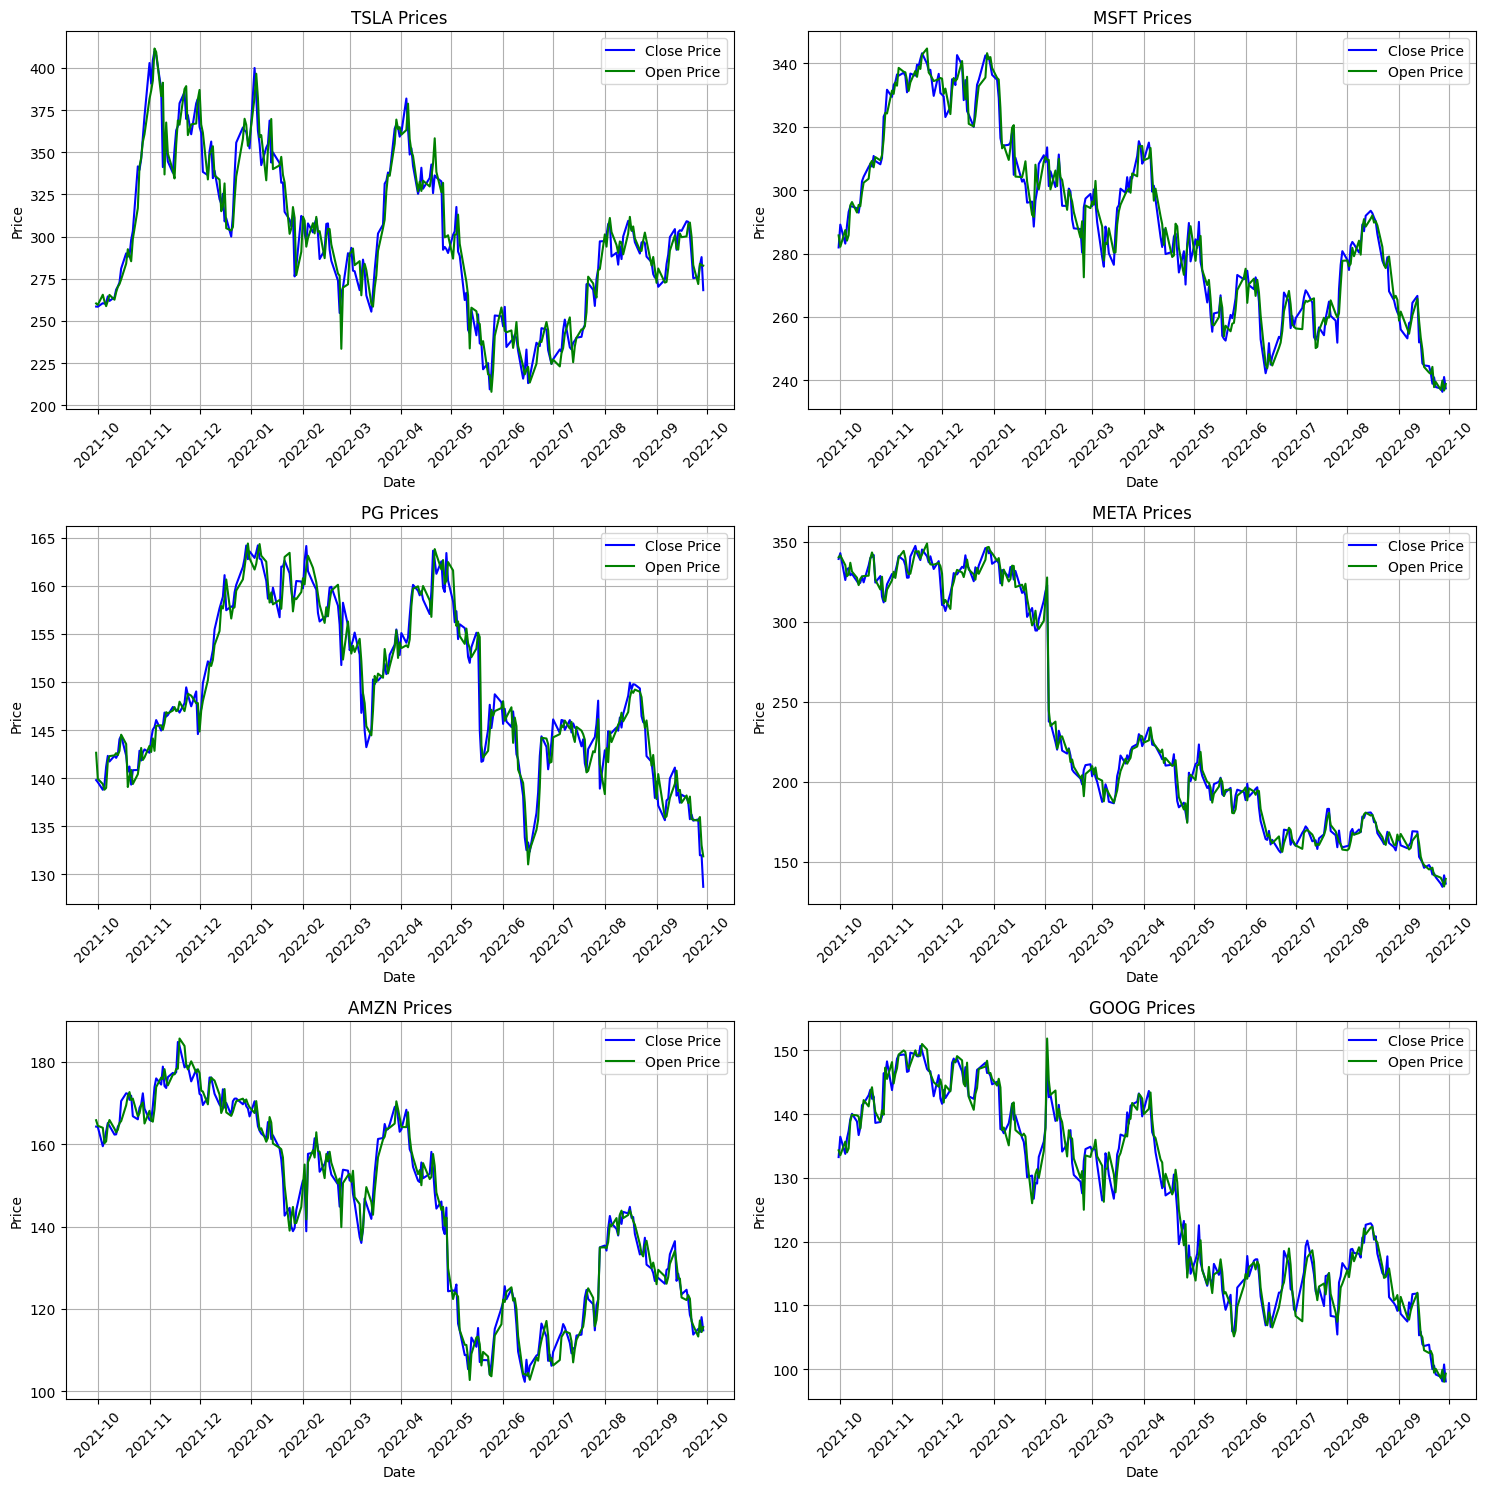

In [16]:
# Define the figure and the axes for the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes

# Create a dictionary where the key is the stock name and the value is the corresponding dataframe
unique_stocks = yfinance_df['Stock Name'].unique()
stocks = {stock: yfinance_df[yfinance_df['Stock Name'] == stock] for stock in unique_stocks}

# Loop through the first 6 stocks and their corresponding axes
for i, (stock_name, stock_df) in enumerate(stocks.items()):
    if i < 6:  # Limit to the first 6 stocks
        ax = axes[i]
        # Plot 'Close' price
        ax.plot(stock_df['Date'], stock_df['Close'], label='Close Price', color='blue')
        # Plot 'Open' price
        ax.plot(stock_df['Date'], stock_df['Open'], label='Open Price', color='green')

        # Set the title and labels
        ax.set_title(f'{stock_name} Prices')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')

        # Format the date axis
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.tick_params(axis='x', which='major', labelrotation=45)

        # Add a grid and a legend
        ax.grid(True)
        ax.legend()

# Adjust the layout to fit everything neatly
plt.tight_layout()
plt.show()


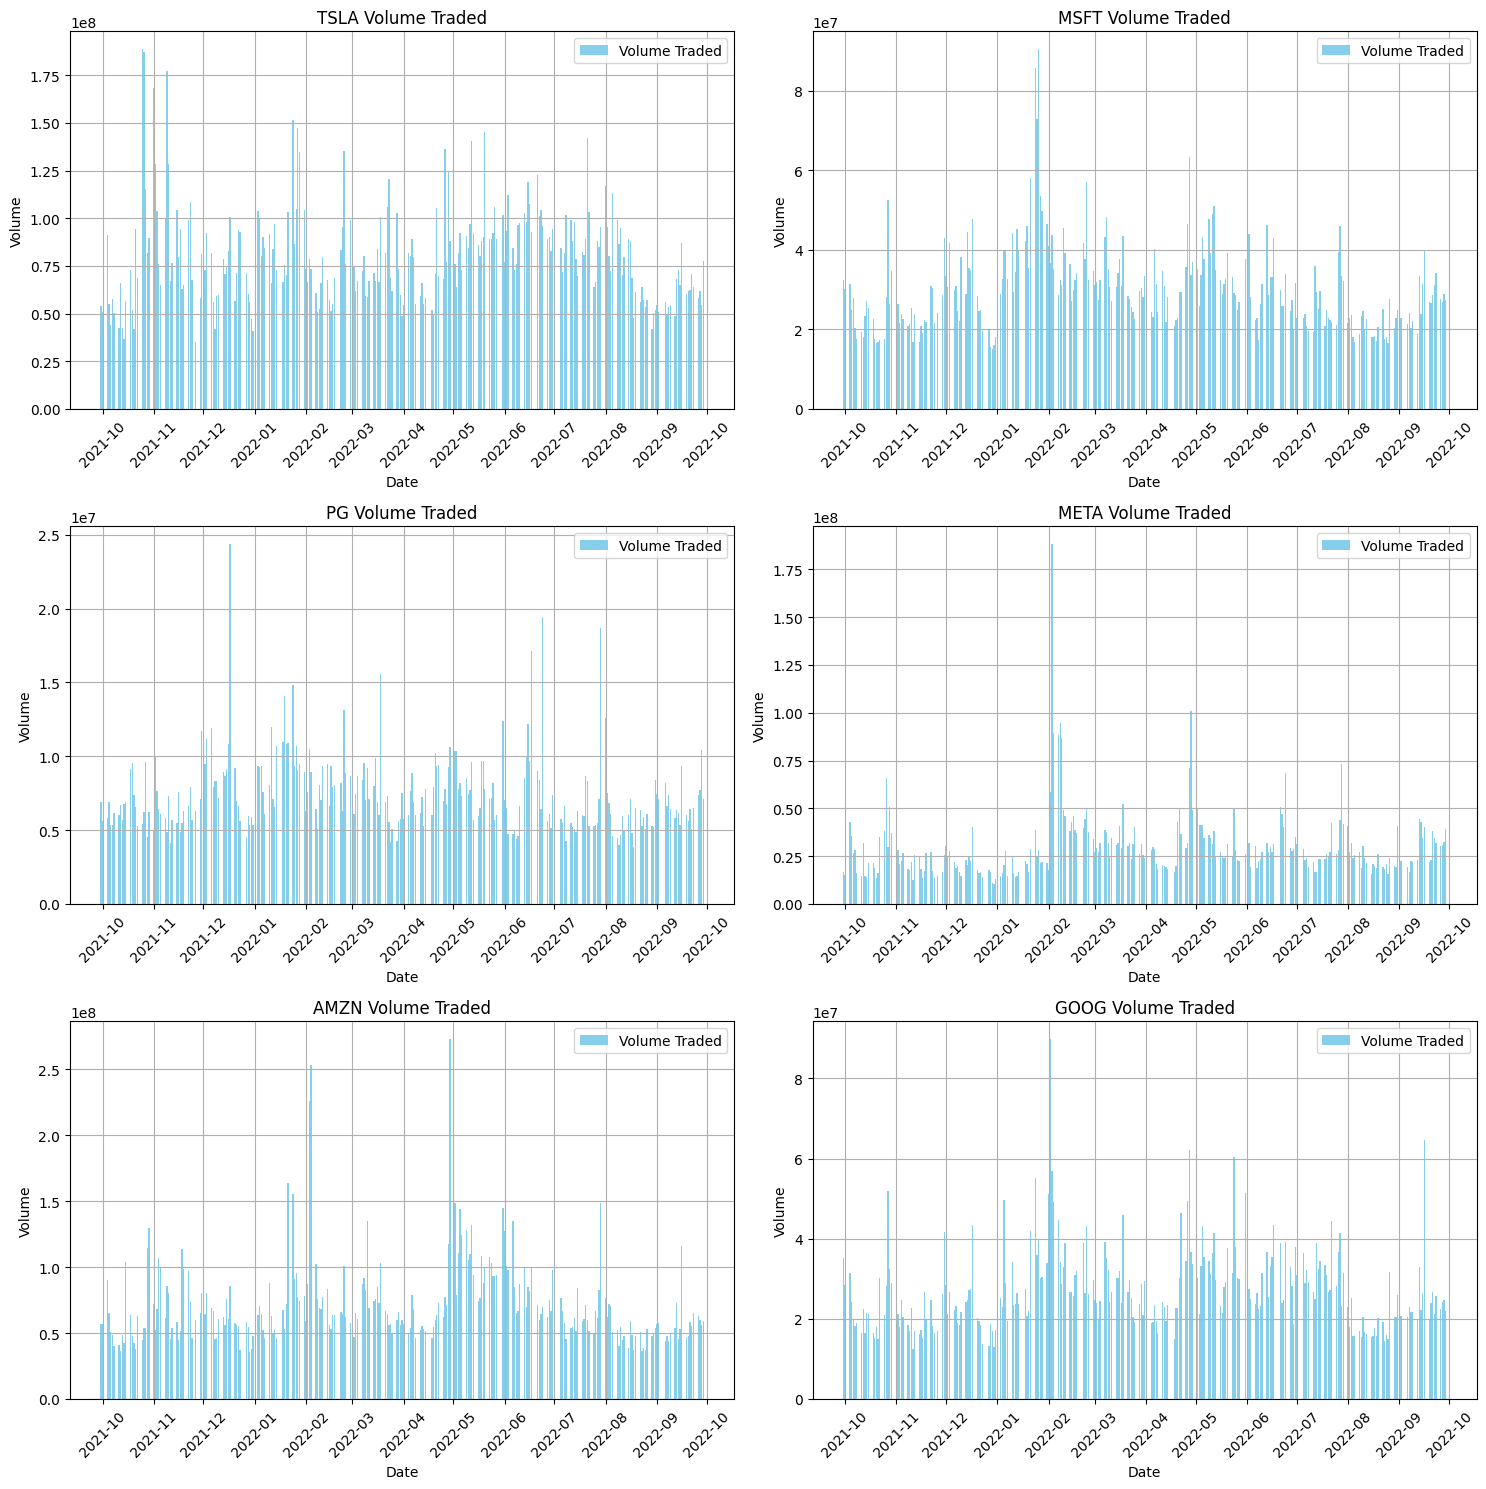

In [17]:
# Define the figure and the axes for the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  # Adjust nrows and ncols based on the number of stocks you have
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through the first 6 stocks and their corresponding axes
for i, (stock_name, stock_df) in enumerate(stocks.items()):
    if i < 6:  # Limit to the first 6 stocks
        ax = axes[i]
        # Plot 'Volume' traded
        ax.bar(stock_df['Date'], stock_df['Volume'], label='Volume Traded', color='skyblue')

        # Set the title and labels
        ax.set_title(f'{stock_name} Volume Traded')
        ax.set_xlabel('Date')
        ax.set_ylabel('Volume')

        # Format the date axis
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.tick_params(axis='x', which='major', labelrotation=45)

        # Optionally, you can use a logarithmic scale if the volumes vary significantly
        # ax.set_yscale('log')

        # Add a grid and a legend
        ax.grid(True)
        ax.legend()

# Adjust the layout to fit everything neatly
plt.tight_layout()
plt.show()


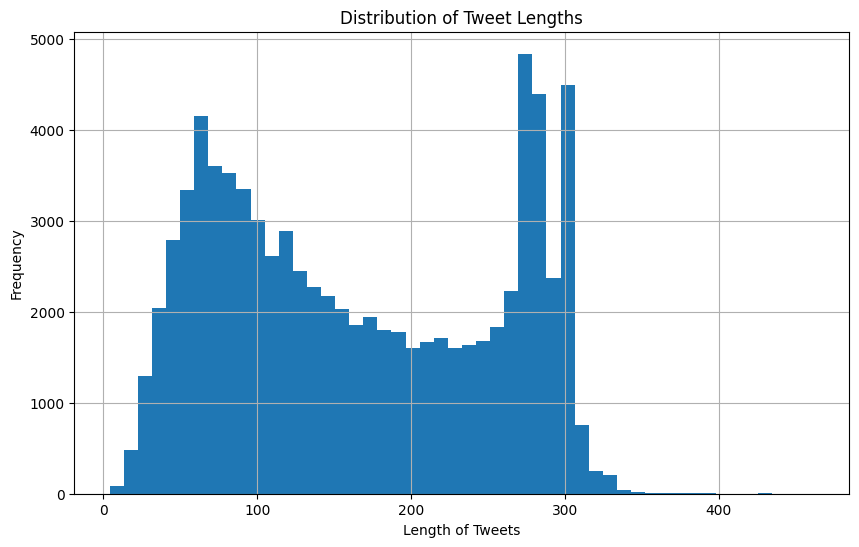

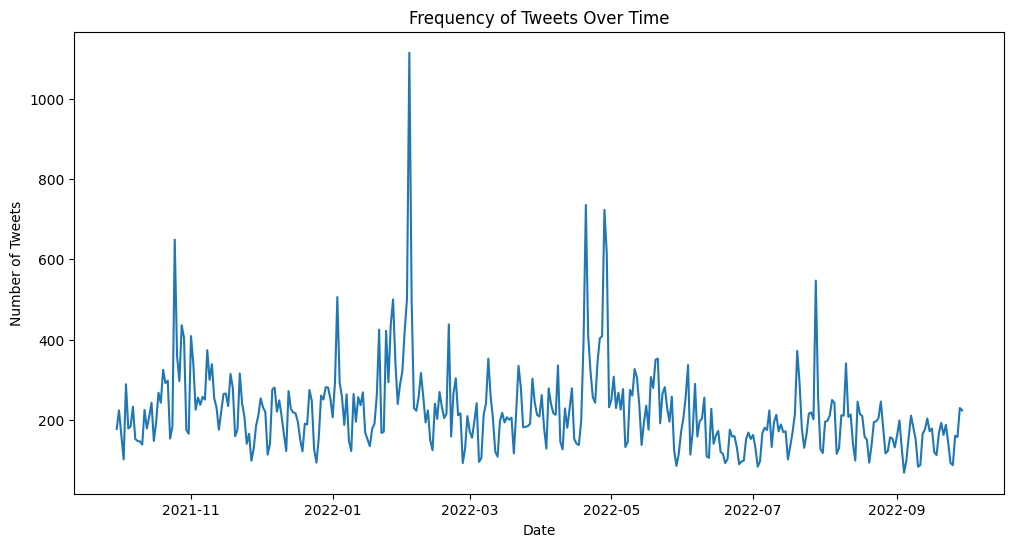

In [18]:
# Tweet Length Analysis
tweets_df['Tweet Length'] = tweets_df['Tweet'].apply(len)
plt.figure(figsize=(10, 6))
tweets_df['Tweet Length'].hist(bins=50)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')
plt.show()

# Frequency of Tweets Over Time
tweets_per_day = tweets_df.groupby(tweets_df['Date'].dt.date).size()
plt.figure(figsize=(12, 6))
tweets_per_day.plot(kind='line')
plt.title('Frequency of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

# Add similar code for sentiment distribution if you have sentiment data


### Step 5: Sentiment Analysis Preparation
Objective: Prepare for sentiment analysis.
Tasks:
Decide on the sentiment analysis approach (e.g., using pre-trained models like VADER or building your own model).
Understand how you'll structure your data for sentiment analysis.


In [19]:
import nltk
nltk.download('vader_lexicon') # Download the vader lexicon for sentiment analysis 

#Initialize the VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

#Define a function to get the sentiment scores
def analyze_sentiment(tweet):
    return sia.polarity_scores(tweet)['compound']

tweets_df['compound_score'] = tweets_df['Tweet'].apply(analyze_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samou\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
#Download the new dataset
tweets_df.to_csv('stock_tweets_with_sentiment.csv', index=False)

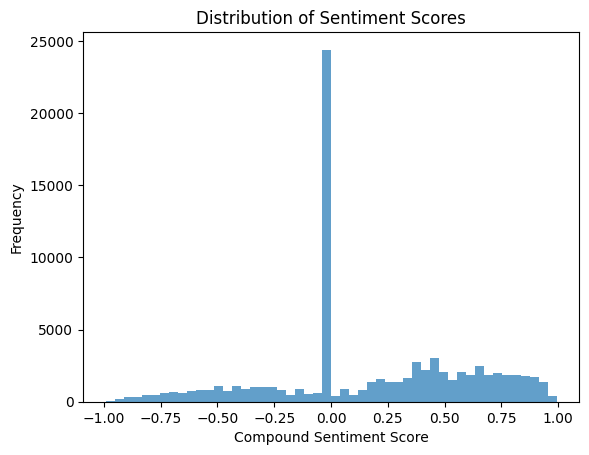

In [21]:
#Plotting the disctirbuion of the compound scores
plt.hist(tweets_df['compound_score'], bins=50, alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


**Histogram Interpretation:**

The histogram shows the distribution of sentiment scores for tweets. Key observations:

- **Neutral Sentiment Bias**: A significant concentration of scores around zero suggests a prevalence of neutral sentiment in the tweets.
- **Presence of Extremes**: Scores spread across the entire range (-1 to +1) indicate the existence of both strongly negative and positive sentiments.
- **Balanced Sentiment**: The distribution appears relatively balanced on either side of zero, indicating a mix of positive and negative sentiments without a strong bias towards either.

This distribution provides a quick overview of the sentiment landscape within the dataset, useful for preliminary insights into public sentiment on stock-related discussions.


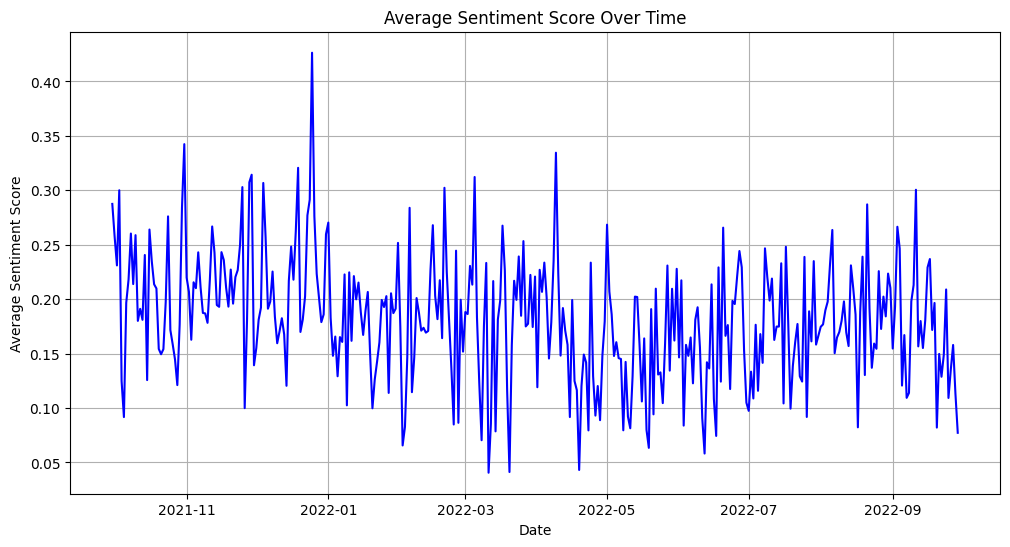

In [23]:
import matplotlib.pyplot as plt

tweets_with_sentiment_df = pd.read_csv('stock_tweets_with_sentiment.csv')
# Sentiment Over Time Analysis
# Converting 'Date' to datetime and extracting the date part for grouping
tweets_with_sentiment_df['Date'] = pd.to_datetime(tweets_with_sentiment_df['Date']).dt.date

# Grouping by date and calculating the mean sentiment score
sentiment_over_time = tweets_with_sentiment_df.groupby('Date')['compound_score'].mean()

# Plotting sentiment over time
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', color='blue')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

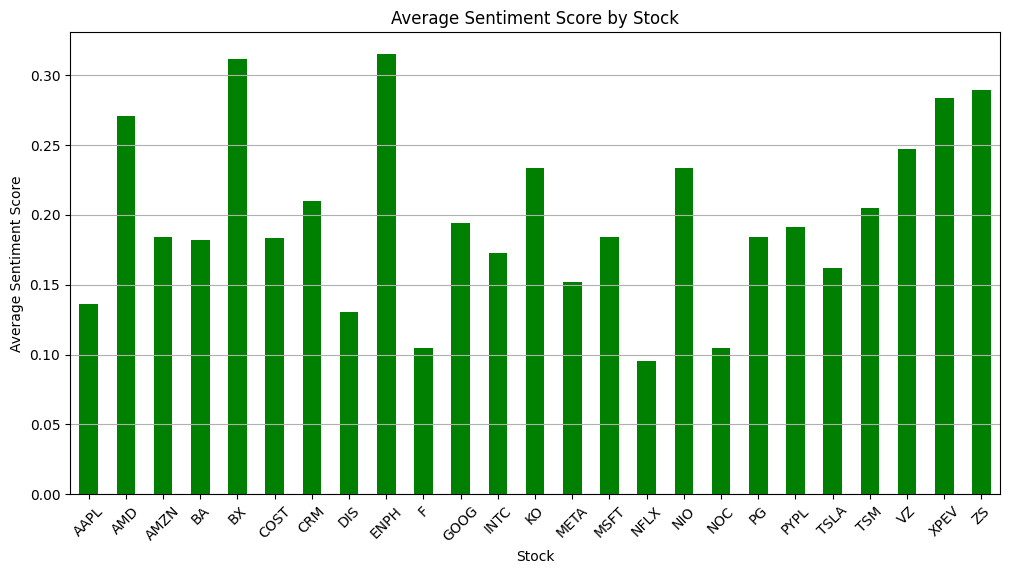

In [24]:
# Sentiment by Stock Analysis
# Grouping by stock and calculating the mean sentiment score
sentiment_by_stock = tweets_with_sentiment_df.groupby('Stock Name')['compound_score'].mean()

# Plotting sentiment by stock
plt.figure(figsize=(12, 6))
sentiment_by_stock.plot(kind='bar', color='green')
plt.title('Average Sentiment Score by Stock')
plt.xlabel('Stock')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The analysis has produced two key visualizations:

### 1. Average Sentiment Score Over Time
This plot shows how the average sentiment score in the tweets changes over time. Observations might include:
- **Trends**: Whether there are any clear upward or downward trends in sentiment over time.
- **Volatility**: Days with significant shifts in sentiment might correspond to specific market events, news, or external factors.
- **Consistency**: Whether the sentiment is generally stable or shows considerable fluctuation.

### 2. Average Sentiment Score by Stock
This plot illustrates the average sentiment score for each stock mentioned in the tweets. Key points to observe:
- **Stock Comparison**: Which stocks have higher or lower average sentiment scores.
- **Outliers**: Stocks with exceptionally high or low sentiment scores might warrant further investigation.
- **Range of Sentiment**: The variation in sentiment across different stocks can indicate differing public perceptions or reactions to these companies.

### Further Analysis
- **Correlation with Stock Prices**: If you have corresponding stock price data, you can explore whether there's a correlation between sentiment scores and stock price movements.
- **Event Correlation**: Investigate whether significant changes in sentiment correspond to specific news events or market changes.

These insights can be valuable for understanding public sentiment's impact on stock performance or for developing trading strategies based on sentiment analysis.